KeyError: 'Key train_loss was not found in Reservoir'

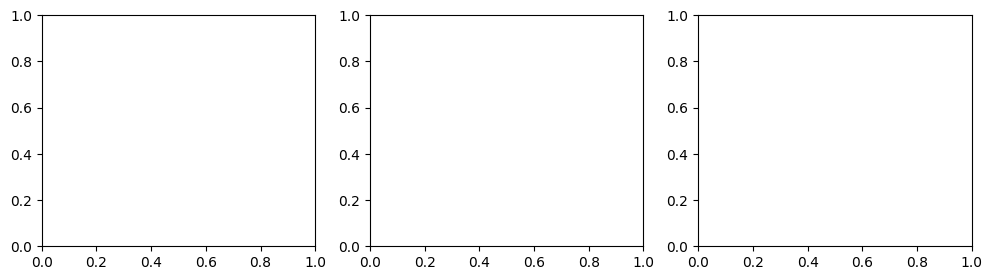

In [48]:
from gflownet.config import init_empty, Config
cfg = init_empty(Config())
from tensorboard.backend.event_processing import event_accumulator
cfg.log_dir = 'vanilla2'
ea = event_accumulator.EventAccumulator(cfg.log_dir)
ea.Reload()

import matplotlib.pyplot as pp
f, ax = pp.subplots(1, 3, figsize=(4*3,3))
ax[0].plot([i.value for i in ea.Scalars('train_loss')])
ax[0].set_yscale('log')
ax[1].set_ylabel('TB loss')
ax[1].plot([i.value for i in ea.Scalars('train_sampled_reward_avg')])
ax[1].set_ylabel('Average reward')
ax[2].plot([i.value for i in ea.Scalars('train_logZ')])
ax[2].set_ylabel('Predicted logZ')
pp.tight_layout()

In [ ]:
"""import importlib
import gflownet.utils.sqlite_log as sqll
importlib.reload(sqll)
results = sqll.read_all_results('D:/Dokumenter/Skole/Prosjektoppgave/prosjektKopi/pom_cpu-model/vanilla/train')
results"""

"import importlib\nimport gflownet.utils.sqlite_log as sqll\nimportlib.reload(sqll)\nresults = sqll.read_all_results('D:/Dokumenter/Skole/Prosjektoppgave/prosjektKopi/pom_cpu-model/vanilla/train')\nresults"

In [ ]:
!pip freeze > requirements.txt


In [ ]:
import sqlite3
import os

path = './vanilla2/train/'
db_files = [f for f in os.listdir(path) if f.startswith("generated_objs") and f.endswith(".db")]

for db_file in db_files:
    try:
        with sqlite3.connect(f"file:{path}/{db_file}?mode=ro", uri=True) as conn:
            conn.execute("SELECT 1")  # Test connection
        print(f"{db_file} is accessible.")
    except sqlite3.OperationalError as e:
        print(f"Error with {db_file}: {e}")

generated_objs_0.db is accessible.


In [ ]:
import sqlite3
import pandas as pd

# Define the path to the accessible database
db_path = './vanilla2/train/generated_objs_0.db'

# Attempt to read from the only existing database file
try:
    # Connect to the existing database and read the results table
    conn = sqlite3.connect(f"file:{db_path}?mode=ro", uri=True)
    results = pd.read_sql_query("SELECT * FROM results", conn)
    conn.close()
    print(results)
except sqlite3.OperationalError as e:
    print(f"Error accessing the database: {e}")

                      smi         r      fr_0  ci_beta
0     FO[SH]12=C3C4P1C342  4.759805  4.759805      1.0
1    [C]1N2N3ON4N2[PH]134  3.009122  3.009122      1.0
2                   O[C]P  6.140796  6.140796      1.0
3          FC1=NO[C]N1[P]  4.371362  4.371362      1.0
4                       N  1.000000  1.000000      1.0
..                    ...       ...       ...      ...
699    C1#S23OC14N2[N]N43  3.045653  3.045653      1.0
700          N1=NN2POP2O1  3.610060  3.610060      1.0
701  O1N2OC13[S]1#[P]23O1  3.847891  3.847891      1.0
702       O1OC23O[C]1N2O3  5.801377  5.801377      1.0
703                   N#N  5.813679  5.813679      1.0

[704 rows x 4 columns]


In [ ]:
results

,smi,r,fr_0,ci_beta
0,FO[SH]12=C3C4P1C342,4.759805,4.759805,1.0
1,[C]1N2N3ON4N2[PH]134,3.009122,3.009122,1.0
2,O[C]P,6.140796,6.140796,1.0
3,FC1=NO[C]N1[P],4.371362,4.371362,1.0
4,N,1.000000,1.000000,1.0
...,...,...,...,...
699,C1#S23OC14N2[N]N43,3.045653,3.045653,1.0
700,N1=NN2POP2O1,3.610060,3.610060,1.0
701,O1N2OC13[S]1#[P]23O1,3.847891,3.847891,1.0
702,O1OC23O[C]1N2O3,5.801377,5.801377,1.0


In [ ]:
df = pd.read_csv("data.csv")
df.head()

,nonStereoSMILES,descriptors,alcoholic,aldehydic,alliaceous,almond,amber,animal,anisic,apple,...,tropical,vanilla,vegetable,vetiver,violet,warm,waxy,weedy,winey,woody
0,CC(O)CN,fishy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CCC(=O)C(=O)O,fatty;lactonic;sweet;caramellic;creamy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,O=C(O)CCc1ccccc1,rose;floral;fatty;sweet;musk;cinnamon;balsamic,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,OCc1ccc(O)cc1,medicinal;phenolic;fruity;nutty;bitter;sweet;a...,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,O=Cc1ccc(O)cc1,phenolic;woody;nutty;vanilla;hay;metallic;swee...,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
common_smiles = set(df["nonStereoSMILES"]).intersection(results["smi"])
len(common_smiles)

5

In [ ]:
# List of SMILES strings to filter by
smiles_list = list(common_smiles)

# Filter DataFrame rows where 'SMILES' column contains values from smiles_list
filtered_df = df[df['nonStereoSMILES'].isin(smiles_list)]

filtered_df

,nonStereoSMILES,descriptors,alcoholic,aldehydic,alliaceous,almond,amber,animal,anisic,apple,...,tropical,vanilla,vegetable,vetiver,violet,warm,waxy,weedy,winey,woody
100,CCN,ripe;cheesy;fishy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102,CC(C)N,cheesy;fishy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3406,CO,alcoholic,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3408,O,odorless,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3466,COC,ethereal,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:


# Filter DataFrame rows where 'SMILES' column contains values from smiles_list
filtered_df2 = results[results['smi'].isin(smiles_list)]

filtered_df2

,smi,r,fr_0,ci_beta
43,O,1.000000,1.000000,1.0
46,O,1.000000,1.000000,1.0
70,O,1.000000,1.000000,1.0
72,O,1.000000,1.000000,1.0
80,O,1.000000,1.000000,1.0
220,O,1.000000,1.000000,1.0
300,O,1.000000,1.000000,1.0
307,O,1.000000,1.000000,1.0
350,O,1.000000,1.000000,1.0
361,CO,8.614797,8.614797,1.0


In [ ]:
from rdkit import Chem

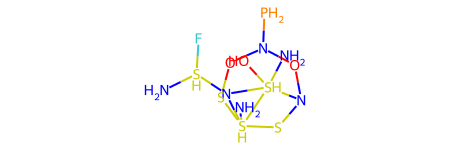

In [49]:
mol = Chem.MolFromSmiles("N[SH](F)N1[SH]23(N)SON(P)ON(S2)[SH]13(N)O")
mol

In [ ]:
mols = ["[N]N(F)[N]OO[S]"
"NOF"
"[C]N([C]F)SOS"
"C1#[P]NOSOO1"
"OP"
"NP(#P)#[PH]OOF"
"O[SH]12=NN1[PH]#S2"
"[C]1=CS12[C]=NN=N2"
"N#CN(F)O[S]=[P]"
"[C]1[C]2OC34N1N3N24"
"FS#SCP"
"N[SH]=C(F)SNP"
"OS1(F)N[P]OS1"
"FNN1S2=NC12F"
"CP"
"N#[S]1[N]C(S)=C1P"
"N1=P2(#[P]#[P]O1)O[P]2"
FS1(F)#S2=NN1O2
FON(F)N1[N][N]1
FOF
[C]S(#N)(O)[SH](N)F
CS(=O)#C[N]OS
FNNP
OS#[SH](F)[N]SS
N#CO[S](S)[N]S
FOF
ON=S
[C]C(F)(F)OC#P
O[N]F
CP[SH]=P
C[SH]1(O)=[S]#CN1[P]
FC#S1=P23#S1(O2)[P]3
OF
N#S1(F)C(=O)N1F
FSSOC(P)S
S=P123=S(#S1)OC2=P3
O=[P]=[P]1=NC=1OF
FOF
FP
FF
[N][SH]1(N)(F)[N]SO1
F[C][P]
OP
O=NO
O=[P](#[S])OONF
FC1SO[SH]1O[S]
NN
SP12(#[SH])OOP1O2
[N]=S12(F)N=P1(F)O2
OF
N#C[PH]#[SH]
CCC(O)OS
N#S12OC#[SH](O1)S2]

In [56]:
from pom_models.functions import fragance_propabilities_from_smiles
v="[H]C(=O)C1=CC(OC)=C(O)C=C1"
probabilities=fragance_propabilities_from_smiles("N#S12OC#[SH](O1)S2")
mol_prob = fragance_propabilities_from_smiles(v)[0]
max_probs = sorted(mol_prob, reverse=True)[:5] 
mask = list(map(lambda x:  1 if x>max_probs[-1] else  0, mol_prob))
import numpy as np
reward_array = np.array(mask) * 10
float(sum((probabilities * reward_array)[0]))

d:\Dokumenter\Skole\Prosjektoppgave\prosjektKopi\pom_cpu-model\venv\lib\site-packages\deepchem\models\torch_models\torch_model.py:1078: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental fe

3.0669689178466797

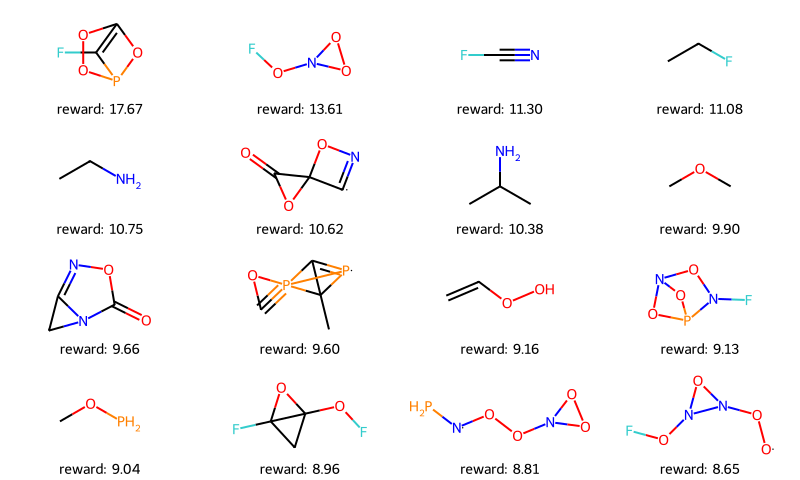

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage
top_k = np.argsort(results['r'])[-16:][::-1]
rewards = results['r'][top_k]
mols = [Chem.MolFromSmiles(i) for i in results['smi'][top_k]]
MolsToGridImage(mols[:16], molsPerRow=4, subImgSize=(200, 120), legends=[f'reward: {r:.2f}' for r in rewards])

In [ ]:
results['smi'][top_k]


195            Fc1c2op1OO2
84                 FOn1oo1
469                   N#CF
203                    CCF
638                    CCN
93         O=C1OC12[C]=NO2
547                 CC(C)N
507                    COC
241           O=c1onc2n1C2
293    CC12C3=[P]1P321#CO1
310                  C=COO
62             Fn1on2op1o2
690                    COP
488          FOC12CC1(F)O2
112            P[N]OOn1oo1
223            [O]On1on1OF
Name: smi, dtype: object

In [ ]:
def num_atoms(s):
    m = Chem.MolFromSmiles(s)
    atoms=m.GetAtoms()
    return len(atoms)


df['mol_size'] = df['nonStereoSMILES'].apply(num_atoms)
df.head()

,nonStereoSMILES,descriptors,alcoholic,aldehydic,alliaceous,almond,amber,animal,anisic,apple,...,vanilla,vegetable,vetiver,violet,warm,waxy,weedy,winey,woody,mol_size
0,CC(O)CN,fishy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,CCC(=O)C(=O)O,fatty;lactonic;sweet;caramellic;creamy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
2,O=C(O)CCc1ccccc1,rose;floral;fatty;sweet;musk;cinnamon;balsamic,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
3,OCc1ccc(O)cc1,medicinal;phenolic;fruity;nutty;bitter;sweet;a...,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,O=Cc1ccc(O)cc1,phenolic;woody;nutty;vanilla;hay;metallic;swee...,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,9


<Axes: >

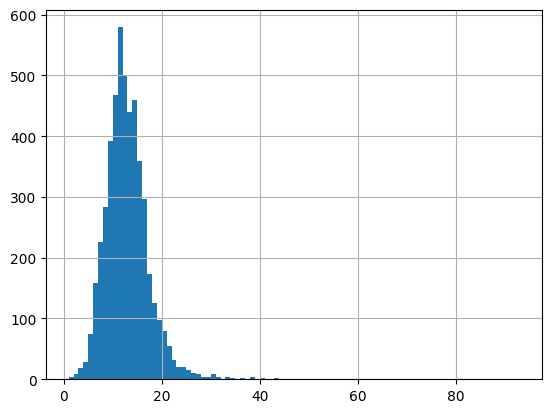

In [ ]:
df['mol_size'].hist(bins=range(df['mol_size'].min(), df['mol_size'].max() + 2))

In [ ]:
df['mol_size']

0        5
1        7
2       11
3        9
4        9
        ..
4978    24
4979    25
4980    26
4981    10
4982    17
Name: mol_size, Length: 4983, dtype: int64

calculate quantiles


In [ ]:
# Calculate specific quantiles
q10 = df['mol_size'].quantile(0.025)  # 10th percentile
q25 = df['mol_size'].quantile(0.25)  # 25th percentile (1st quartile)
q50 = df['mol_size'].quantile(0.50)  # 50th percentile (median)
q75 = df['mol_size'].quantile(0.75)  # 75th percentile (3rd quartile)
q90 = df['mol_size'].quantile(0.975)  # 90th percentile
q95 = df['mol_size'].quantile(0.95)  # 90th percentile


print(f"2.5th percentile: {q10}")
print(f"25th percentile (Q1): {q25}")
print(f"50th percentile (Median): {q50}")
print(f"75th percentile (Q3): {q75}")
print(f"97.5th percentile: {q90}")
print(f"95th percentile: {q95}")



2.5th percentile: 5.0
25th percentile (Q1): 10.0
50th percentile (Median): 12.0
75th percentile (Q3): 15.0
97.5th percentile: 23.0
95th percentile: 20.0
